## Описание работы:     

   **Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом.**

   **Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.**

   **Предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты.**

## 1. Описание данных

     customerID – id клиента
     gender – пол клиента (male/female)
     SeniorCitizen – яляется ли клиент пенсионером (1, 0)
     Partner – состоит ли клиент в браке (Yes, No)
     Dependents – есть ли у клиента иждивенцы (Yes, No)
     tenure – сколько месяцев человек являлся клиентом компании
     PhoneService – подключена ли услуга телефонной связи (Yes, No)
     MultipleLines – подключены ли несколько телефонных линий (Yes, No, No phone service)
     InternetService – интернет-провайдер клиента (DSL, Fiber optic, No)
     OnlineSecurity – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)
     OnlineBackup – подключена ли услуга online backup (Yes, No, No internet service)
     DeviceProtection – есть ли у клиента страховка оборудования (Yes, No, No internet service)
     TechSupport – подключена ли услуга технической поддержки (Yes, No, No internet service)
     StreamingTV – подключена ли услуга стримингового телевидения (Yes, No, No internet service)
     StreamingMovies – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)
     Contract – тип контракта клиента (Month-to-month, One year, Two year)
     PaperlessBilling – пользуется ли клиент безбумажным биллингом (Yes, No)
     PaymentMethod – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
     MonthlyCharges – месячный размер оплаты на настоящий момент
     TotalCharges – общая сумма, которую клиент заплатил за услуги за все время
     Churn – произошел ли отток (Yes or No)

In [657]:
%matplotlib inline
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (9, 6)}) #надстройка для большого графика


import warnings
warnings.filterwarnings('ignore')

In [658]:
data = pd.read_csv("telecom_users.csv") #чтение данных
y = data['Churn']
X = data.drop(['Churn', 'Unnamed: 0'], axis=1) 

title_mapping = {"No": 0, "Yes": 1} #мэппинг зависимой переменной
y = y.map(title_mapping).astype(int)

In [659]:
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5


In [660]:
y.value_counts() #Несбалансированный датасет - неравные классы - метрика accuracy бесполезна

0    4399
1    1587
Name: Churn, dtype: int64

Несбалансированный датасет - неравные классы - метрика accuracy бесполезна.

В рамках задачи оттока нам важнее найти клиентов, которые собираются от нас уйти, чем найти клиентов, которые от нас уходить не собираются. Поэтому если мы ошибочно отнесем клиента, который уходить не собирается, к оттоку, это не так страшно, как если мы пропустим клиента, который от нас уходить собирается, потому что в этом случае мы, конечно же, не сможем его удержать.

Другими словами нам нестрашно сделать ложное срабатывание (FP), т.е. выбирается метрика Полнота (recall) - нужно меньше ложных пропусков (FN).

In [661]:
X.isnull().any() #проверка пустых значений датасета

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
dtype: bool

 Можно заменить пропуски на 0 - этот способ является предпочтительным для логистической регрессии, поскольку он позволит пропущенному значению не вносить никакого вклада в предсказание. Для деревьев часто лучшим вариантом оказывается замена пропуска на очень большое или очень маленькое значение — в этом случае при построении разбиения вершины можно будет отправить объекты с пропусками в отдельную ветвь дерева. Также есть и другие подходы — например, замена пропуска на среднее или медианное значение признака

In [662]:
X.dtypes # типы фичей

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

     tenure – сколько месяцев человек являлся клиентом компании
     MonthlyCharges – месячный размер оплаты на настоящий момент
     TotalCharges – общая сумма, которую клиент заплатил за услуги за все время

In [663]:
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], downcast='float', errors='coerce') #конвертация общей суммы в целый тип
X.isnull().sum() # Проверка ошибки конвертации - 10 значений 
Total_charges_median = X.query('TotalCharges >= 0')['TotalCharges'].median() # медианное значение для замены ошибочных значений
X['TotalCharges'].fillna(Total_charges_median, inplace=True)


In [664]:
X.shape

(5986, 20)

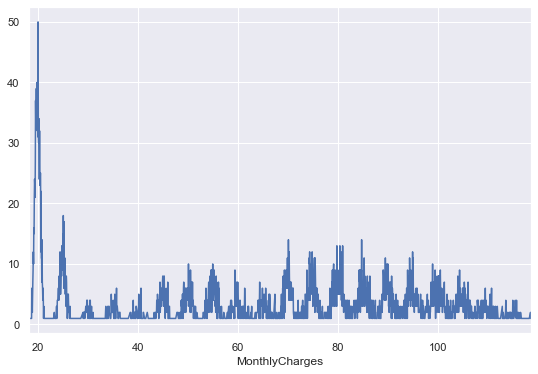

In [665]:
X.groupby('MonthlyCharges')['customerID'].nunique().plot() #Распределение месячного размера оплаты по пользователям

In [666]:
X.loc[ : , ['tenure', 'MonthlyCharges', 'TotalCharges']].describe() #основные статистики для числовых фичей:

# tenure – сколько месяцев человек являлся клиентом компании
# MonthlyCharges – месячный размер оплаты на настоящий момент
# TotalCharges – общая сумма, которую клиент заплатил за услуги за все время

#count - количество
#mean - среднее значение
#std - стандартное отклонение
#min, max - минимальное и максимальное значение
#25%, 50%, 75% - квартили распределения

,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000
mean,32.468760,64.802213,2296.575195
std,24.516391,30.114702,2272.514648
min,0.000000,18.250000,18.799999
25%,9.000000,35.650000,406.274994
50%,29.000000,70.400000,1412.150024
75%,56.000000,89.900000,3841.500061
max,72.000000,118.750000,8684.799805


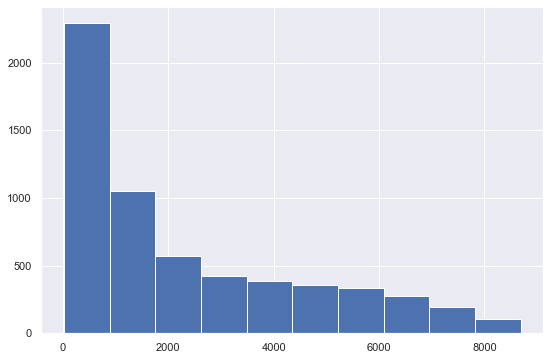

In [667]:
X['TotalCharges'].hist()

In [668]:
X_analys = X.copy() #базовый датасет для анализа

In [669]:
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.650024
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.199951
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.850098
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.500000
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.500000


Проверка уникальности идентификаторов пользователей

In [670]:
X.groupby('customerID').agg({'customerID':'nunique'}).count() #проверка уникальных пользоваталей из датасета


customerID    5986
dtype: int64

In [671]:
X.shape

(5986, 20)

In [672]:
X = X.drop('customerID', axis = 1)

In [673]:
#перевод категориальных фичей в числовые

X = pd.get_dummies(X, prefix=['gend'], columns = ['gender'])
X = pd.get_dummies(X, prefix=['Partner'], columns = ['Partner'])
X = pd.get_dummies(X, prefix=['Dependents'], columns = ['Dependents'])
X = pd.get_dummies(X, prefix=['PhoneService'], columns = ['PhoneService'])
X = pd.get_dummies(X, prefix=['MultipleLines'], columns = ['MultipleLines'])
X = pd.get_dummies(X, prefix=['EService'], columns = ['InternetService'])
X = pd.get_dummies(X, prefix=['OnSecurity'], columns = ['OnlineSecurity'])
X = pd.get_dummies(X, prefix=['OnBackup'], columns = ['OnlineBackup'])
X = pd.get_dummies(X, prefix=['DevProtect'], columns = ['DeviceProtection'])
X = pd.get_dummies(X, prefix=['TechSupport'], columns = ['TechSupport'])
X = pd.get_dummies(X, prefix=['StreamTV'], columns = ['StreamingTV'])
X = pd.get_dummies(X, prefix=['StreamMov'], columns = ['StreamingMovies'])
X = pd.get_dummies(X, prefix=['c_type'], columns = ['Contract'])
X = pd.get_dummies(X, prefix=['PaperlessBill'], columns = ['PaperlessBilling'])



title_mapping = {"Electronic check": 1, "Mailed check": 2, "Bank transfer (automatic)": 3, "Credit card (automatic)": 4}
X['PaymentMethod'] = X['PaymentMethod'].map(title_mapping).astype(int)

pd.set_option('display.max_columns', None)

Корреляция признаков

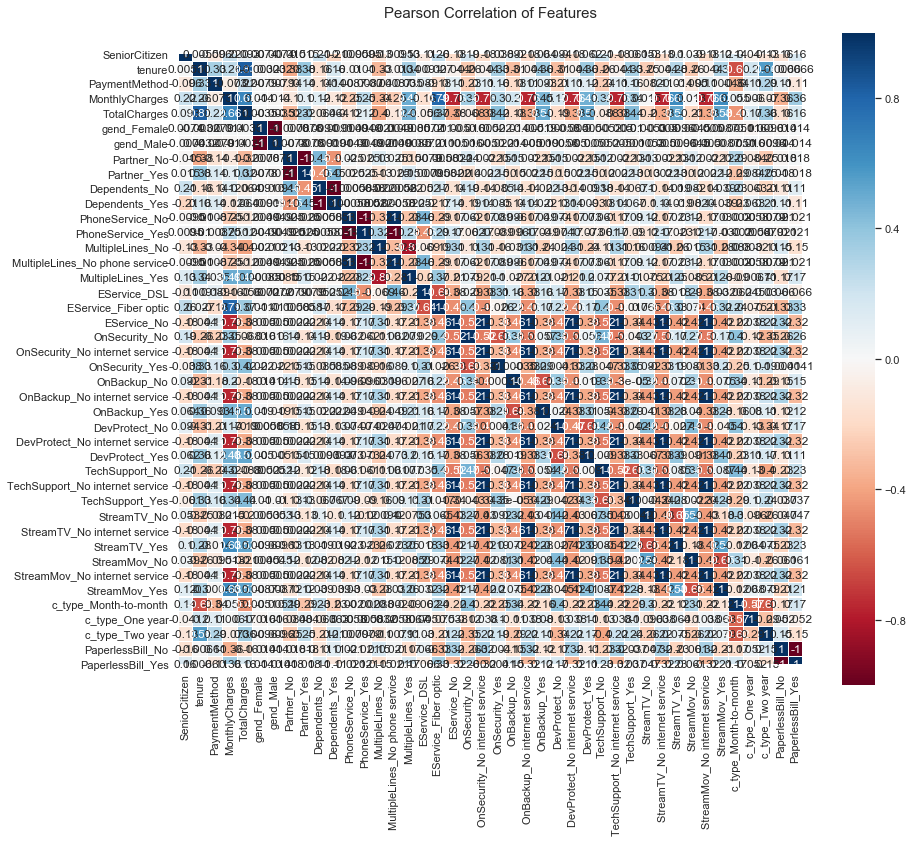

In [674]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [675]:
X_an = X.corr()

In [676]:
for column in X_an.columns:
    for index in X_an.index:
        if (((X_an.loc[index, column] > 0.8) | (X_an.loc[index, column] < - 0.8)) & (index != column) & (str(index)[0:5] != (str(column)[0:5]))):
            print(index,",",column, X_an.loc[index, column])

TotalCharges , tenure 0.8269812941607965
tenure , TotalCharges 0.8269812941607965
MultipleLines_No phone service , PhoneService_No 1.0
MultipleLines_No phone service , PhoneService_Yes -1.0
PhoneService_No , MultipleLines_No phone service 1.0
PhoneService_Yes , MultipleLines_No phone service -1.0
OnSecurity_No internet service , EService_No 1.0
OnBackup_No internet service , EService_No 1.0
DevProtect_No internet service , EService_No 1.0
TechSupport_No internet service , EService_No 1.0
StreamTV_No internet service , EService_No 1.0
StreamMov_No internet service , EService_No 1.0
EService_No , OnSecurity_No internet service 1.0
OnBackup_No internet service , OnSecurity_No internet service 1.0
DevProtect_No internet service , OnSecurity_No internet service 1.0
TechSupport_No internet service , OnSecurity_No internet service 1.0
StreamTV_No internet service , OnSecurity_No internet service 1.0
StreamMov_No internet service , OnSecurity_No internet service 1.0
EService_No , OnBackup_No i

In [677]:
X.head() #датасет для обучения моделей

,SeniorCitizen,tenure,PaymentMethod,MonthlyCharges,TotalCharges,gend_Female,gend_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,EService_DSL,EService_Fiber optic,EService_No,OnSecurity_No,OnSecurity_No internet service,OnSecurity_Yes,OnBackup_No,OnBackup_No internet service,OnBackup_Yes,DevProtect_No,DevProtect_No internet service,DevProtect_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamTV_No,StreamTV_No internet service,StreamTV_Yes,StreamMov_No,StreamMov_No internet service,StreamMov_Yes,c_type_Month-to-month,c_type_One year,c_type_Two year,PaperlessBill_No,PaperlessBill_Yes
0,0,72,4,24.10,1734.650024,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0
1,0,44,4,88.15,3973.199951,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1
2,1,38,3,74.95,2869.850098,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
3,0,4,1,55.90,238.500000,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1
4,0,2,1,53.45,119.500000,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0


## 2. Исследование зависимостей и формулирование гипотез

In [678]:
X_analys.groupby(['Partner', 'Dependents'], as_index=False).agg({'tenure': 'mean'}) \
        .sort_values(by='tenure', ascending=False) 

,Partner,Dependents,tenure
2,Yes,No,42.819014
3,Yes,Yes,41.442049
1,No,Yes,24.925081
0,No,No,23.208288


Проверим зависимость количества месяцев клиентства от наличия брака и иждивенцев у клиента

Наблюдается сильная корреляция вышеуказанных признаков - наличие иждивенцев напрямую зависит от наличия брака у клиента

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF2D273F48>]],
      dtype=object)

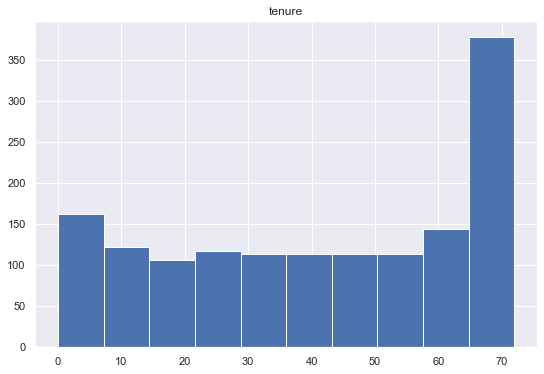

In [679]:
X.query('Partner_Yes == 1 & Dependents_Yes == 1')[['tenure']].sort_values(by='tenure').hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF3CC3A308>]],
      dtype=object)

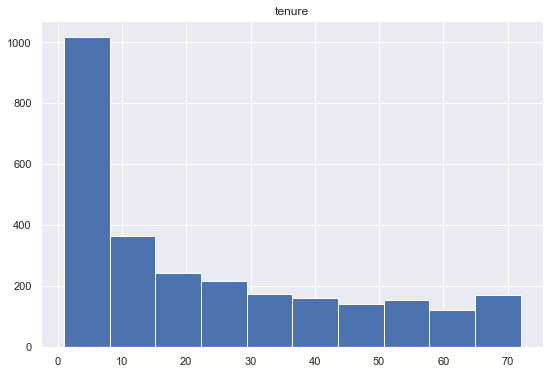

In [680]:
X.query('Partner_No == 1 & Dependents_No == 1')[['tenure']].sort_values(by='tenure').hist()

Наблюдается стабильность пользования услугами компании у пользователей, находящихся в браке и имеющих иждевенцев,
наибольшее число таких пользоваталей наблюдается после долгосрочного пользования услугами (5 лет) (см. 1 график)

Из числа пользователей не состоящих в браке и не имеющих иждивенцев наблюдается снижение заинтересованности 
в услугах компании - резкое снижение после недолгосрочного использования и постепенное после пользования услугами 
от года и более (см. 2 график).

Стоит обратить внимание на клиентов 2 категории и попытаться удержать в первые месяцы пользования услугами 
предлагая специальные предложения 



In [681]:
# Рассмотрим зависимость типа контракта клиента и метода оплаты от общего дохода компании с клиента и длительности обслуживания

In [682]:
X_analys.groupby(['Contract', 'PaymentMethod'], as_index=False).agg({'TotalCharges': 'mean', 'tenure': 'mean'}) \
        .sort_values(by=['tenure'], ascending=False)

,Contract,PaymentMethod,TotalCharges,tenure
10,Two year,Electronic check,5349.495117,61.539474
8,Two year,Bank transfer (automatic),4182.545898,61.503226
9,Two year,Credit card (automatic),4052.912598,59.711730
6,One year,Electronic check,3868.158203,46.346801
4,One year,Bank transfer (automatic),3319.591309,45.621622
5,One year,Credit card (automatic),3358.091064,45.289017
11,Two year,Mailed check,1863.090210,43.115265
7,One year,Mailed check,1505.639282,29.306667
0,Month-to-month,Bank transfer (automatic),1883.425781,24.594118
1,Month-to-month,Credit card (automatic),1801.684326,24.017621


Наибольшую прибыль приносят клиенты с двухгодовым контрактом и методом оплаты - электронный платеж.
Наименьшую с помесячным типом контрата с методом оплаты почтовой квитацией

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF3CB71908>]],
      dtype=object)

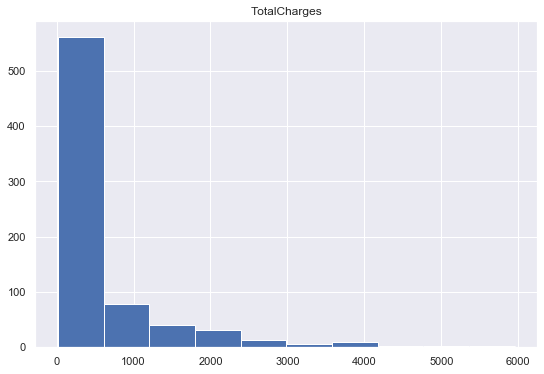

In [683]:
X_analys.query('Contract == "Month-to-month" & PaymentMethod == "Mailed check"')[['TotalCharges']].sort_values(by='TotalCharges').hist()

Наблюдается резкое снижение прибыли от клиентов вышеуказанного типа*, возможно из-за невыгодоного помесячного тарифа
и неудобным способ оплаты услуг, компании стоит предложить таким клиентам годовой или двухгодовой контракт,
подробно разъяснив выгоду для клиента и также попытаться перевести клиента в безналичный расчет - так как клиенту будет легче 
расплачиваться за услуги электронными платежами или автоматическими списаниями

In [684]:
# Проверим какие клиенты на данном промежутке принесли компании максимальный доход

In [685]:
X_analys.sort_values(by='TotalCharges').tail(20).drop(['customerID', 'Dependents'], axis = 1)

,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5607,Male,0,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),114.45,8375.049805
4116,Male,1,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),115.75,8399.150391
3513,Male,1,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.05,8404.900391
4407,Female,0,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),115.05,8405.000000
1306,Male,0,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.80,8424.900391
3489,Female,0,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,115.50,8425.150391
1538,Male,0,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,115.55,8425.299805
3309,Female,1,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.35,8436.250000
4956,Female,0,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.80,8456.750000
3823,Female,0,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.80,8476.500000


В данной выборке наблюдается независимость пола клиента, так как в равной степени присутствуют и мужчины, и женщины,
данные клиенты пользуются оптоволоконным соединением и срок пользования услугами больше 70 месяцев, 
возможно компании стоит предлагать клиентам переход на данный тип соединения, так как в долгосрочной перспективе мы видим, что такие клиенты остаются и приносят максимальную прибыль.

Также у всех клиентов выборки подключены услуги тех.поддержки, страховки и стриминговых сервисов, что опять же свидетельсвует 
о удовлетворенности клиентов указанными услугами, которые помогают удерживать клиентов, то есть для клиентов, которые
пользуются услугами в районе 2-3х лет, но не подключены дополнительные опции (страховка, тех.поддержка и т.д.),
стоит предлагать подключить данные услуги, чтобы гарантировать удержание на более длительное время.

Подтвеждается гипотеза что электронный и автоматический расчет наиболее удобен для клиентов и удерживает на длительный срок.

## 3. Построение моделей для прогнозирования оттока

In [686]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

In [687]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)  #Разбиение датасета на трейн и тестовый

Одним из наиболее распространенных методов для бинарной классификации является логистическая регрессия

In [688]:
#Построение моделей

# Logistic Regression

logreg = LogisticRegression(penalty='l2', random_state=42) #l2 при мультиколлинеарности признаков
logreg_model = logreg.fit(X_train, Y_train)
lr_predictions = logreg.predict(X_test)
lr_recall = recall_score(Y_test, lr_predictions)
lr_f1_score= f1_score(Y_test, lr_predictions)
lr_roc_auc = roc_auc_score(Y_test, lr_predictions)

Применим для небольших объемов данных, почти нет выбросов, отбор признаков в нашем случае не нужен

In [689]:
# C-Support Vector Classification

svc = SVC(kernel='linear', C=1, random_state=42)
svc_model = svc.fit(X_train, Y_train)
svc_predictions = svc.predict(X_test)
svc_recall = recall_score(Y_test, svc_predictions)
svc_f1_score= f1_score(Y_test, svc_predictions)
svc_roc_auc = roc_auc_score(Y_test, svc_predictions)

Устойчив к выбросам, модифицируется под задачу, небольшой объем данных

In [690]:
# K-nearest neighbors

knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, Y_train)
knn_predictions = knn.predict(X_test)
knn_recall = recall_score(Y_test, knn_predictions)
knn_f1_score= f1_score(Y_test, knn_predictions)
knn_roc_auc = roc_auc_score(Y_test, knn_predictions)

Быстро выполняется, много категориальных признаков - алгоритм лучше работает, мало коррелирующих признаков

In [691]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gauss_model = gaussian.fit(X_train, Y_train)
gauss_predictions = gaussian.predict(X_test)
gauss_recall = recall_score(Y_test, gauss_predictions)
gauss_f1_score= f1_score(Y_test, gauss_predictions)
gauss_roc_auc = roc_auc_score(Y_test, gauss_predictions)

Один из самых универсальных алгоритмов является градиентный бустинг. Он не очень требователен к данным, восстанавливает нелинейные зависимости, и хорошо работает на многих наборах данных, что и обуславливает его популярность. Вполне разумной мыслью будет попробовать его.

In [692]:
# Gradient Boosting

gbc = GradientBoostingClassifier(random_state=42)
gbc_model = gbc.fit(X_train, Y_train)
gbc_predictions = gbc.predict(X_test)
gbc_recall = recall_score(Y_test, gbc_predictions)
gbc_f1_score = f1_score(Y_test, gbc_predictions)
gbc_roc_auc = roc_auc_score(Y_test, gbc_predictions)

Устойчивость к машстабу признаков, допускает разнотипные данные, не бывает отказов от классификации

In [693]:
# Random Forest

random_forest = RandomForestClassifier(random_state=42)
rfc_model = random_forest.fit(X_train, Y_train)
rfc_predictions = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
rfc_recall = recall_score(Y_test, rfc_predictions)
rfc_f1_score = f1_score(Y_test, rfc_predictions)
rfc_roc_auc = roc_auc_score(Y_test, rfc_predictions)

## 4. Сравнение качества моделей

In [694]:
#Сравним модели по основным метрикам Recall, F1_score, Roc-Auc (т.к. у нас несбалансированный класс зав. перем.)

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'C-Support Vector Classification', 'K-nearest neighbors', 'Gaussian Naive Bayes', 
              'Gradient Boosting', 'Random Forest'],
     
    'Recall': [lr_recall, svc_recall, knn_recall, gauss_recall, gbc_recall, rfc_recall],
    'F1_score': [lr_f1_score, svc_f1_score, knn_f1_score, gauss_f1_score, gbc_f1_score, rfc_f1_score],
    'Roc-Auc' : [lr_roc_auc, svc_roc_auc, knn_roc_auc, gauss_roc_auc, gbc_roc_auc, rfc_roc_auc]




})
models.sort_values(by=['Recall', 'Roc-Auc', 'F1_score'], ascending=False)

,Model,Recall,F1_score,Roc-Auc
3,Gaussian Naive Bayes,0.828571,0.563604,0.721840
0,Logistic Regression,0.537662,0.583921,0.716223
4,Gradient Boosting,0.527273,0.578348,0.712377
1,C-Support Vector Classification,0.449351,0.537267,0.686006
5,Random Forest,0.444156,0.503682,0.666772
2,K-nearest neighbors,0.423377,0.472464,0.647839


Наилучший показатель Recall (полноты) демонстрирует Байесовский классификатор, поэтому будем ориентироваться на эту модель.
Она же и демонстрирует наилучший показатель Roc-Auc, демонстрирующий качество классификации, т.е. произойдет отток или нет.

In [695]:
#Попробуем улучшить метрику, подобрав наилучшие параметры моделей алгоримтов на 2 и 3 месте по Recall

#Выведем лучшие параметры для экономии времени расчета (предварительно посчитаны)

#lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}
#skf = StratifiedKFold(n_splits=5, random_state=17)
#lr_grid = GridSearchCV(logreg, lr_params, cv=skf)
#lr_grid1 = lr_grid.fit(X_train, Y_train)
#lr_grid1.best_params_
print("{'C': 0.01, 'solver': 'liblinear'}")

{'C': 0.01, 'solver': 'liblinear'}


In [696]:
logreg1 = LogisticRegression(C=0.01,solver='liblinear', random_state=42)
logreg.fit(X_train, Y_train)
lr_predictions1 = logreg.predict(X_test)
lr_recall = recall_score(Y_test, lr_predictions)
lr_f1_score= f1_score(Y_test, lr_predictions)
lr_roc_auc = roc_auc_score(Y_test, lr_predictions)

In [697]:
#gbc_params = {'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'n_estimators':[10, 25, 100, 500, 1000], 'max_depth': range(1, 10) }
#gbc_grid = GridSearchCV(gbc, gbc_params, cv= skf)
#gbc_grid1 = gbc_grid.fit(X_train, Y_train)
#gbc_grid1.best_params_
print("{learning_rate=0.06, n_estimators=100, max_depth=3 , random_state=42}")

{learning_rate=0.06, n_estimators=100, max_depth=3 , random_state=42}


In [698]:
gbc1 = GradientBoostingClassifier(learning_rate=0.06, n_estimators=100, max_depth=3 , random_state=42)
gbc.fit(X_train, Y_train)
gbc_predictions1 = gbc.predict(X_test)
gbc_recall = recall_score(Y_test, gbc_predictions)
gbc_f1_score = f1_score(Y_test, gbc_predictions)
gbc_roc_auc = roc_auc_score(Y_test, gbc_predictions)

In [699]:
fine_model = pd.DataFrame({
    'Model': ['Logistic Regression', 'Gradient Boosting'],
     
    'Recall': [lr_recall, gbc_recall],
    'F1_score': [lr_f1_score, gbc_f1_score],
    'Roc-Auc' : [lr_roc_auc, gbc_roc_auc]
})


In [700]:
fine_model

,Model,Recall,F1_score,Roc-Auc
0,Logistic Regression,0.537662,0.583921,0.716223
1,Gradient Boosting,0.527273,0.578348,0.712377


In [701]:
models.sort_values(by=['Recall', 'Roc-Auc', 'F1_score'], ascending=False) #Изначальные метрики

,Model,Recall,F1_score,Roc-Auc
3,Gaussian Naive Bayes,0.828571,0.563604,0.721840
0,Logistic Regression,0.537662,0.583921,0.716223
4,Gradient Boosting,0.527273,0.578348,0.712377
1,C-Support Vector Classification,0.449351,0.537267,0.686006
5,Random Forest,0.444156,0.503682,0.666772
2,K-nearest neighbors,0.423377,0.472464,0.647839


Можем наблюдать незначительное снижение Recall, поэтому выбираем модель, 
построенную алгоритмом Байесовского классификатора.

Также выведем ранжирование важности фичей на основе Random Forest классификатора

In [702]:
pd.DataFrame(rfc_model.feature_importances_, index=X_train.columns, columns=['Importance']) \
    .sort_values('Importance', ascending=False).head()

,Importance
TotalCharges,0.167210
MonthlyCharges,0.135647
tenure,0.127819
c_type_Month-to-month,0.070613
PaymentMethod,0.054310


Настроим мета-алгоритм на мета-признаках с целью получить лучшее качество модели

In [710]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict

In [704]:
xgb_params = {'n_estimators': range(10, 100, 5),
              'eta': np.arange(0.1, 1., .1),
              'min_child_weight': range(1, 10, 1),
              'subsample': np.arange(0.1, 1., 0.2)}

In [705]:
predictions = [lr_predictions, svc_predictions, knn_predictions, gauss_predictions, gbc_predictions, rfc_predictions]

meta = XGBClassifier(random_state=42)

meta_alg = GridSearchCV(meta, xgb_params, cv=5)

#meta_mtrx = np.empty((Y_test.shape[0], len(predictions)))
#for n, prediction in enumerate(predictions):
    #meta_mtrx[:, n] = prediction

#meta_model = meta_alg.fit(meta_mtrx, Y_test)
#meta_model.best_params_
print("{'eta': 0.1,'min_child_weight': 8,'n_estimators': 15,'subsample': 0.9}")

{'eta': 0.1,'min_child_weight': 8,'n_estimators': 15,'subsample': 0.9}


In [706]:
meta = XGBClassifier(eta=0.1, min_child_weight=8, n_estimators=15, subsample=0.9)

Cтекинг (используется 5-кратная кросс-валидацию) для всех моделей

In [707]:
models = [logreg_model, svc_model, knn_model, gauss_model, gbc_model, rfc_model]
base_algorithm = [logreg, svc, knn, gaussian, gbc,random_forest]

In [711]:
meta_mtrx = np.empty((X_train.shape[0], len(models)))
for n, model in enumerate(models):
    meta_mtrx[:, n] = cross_val_predict(estimator=base_algorithm[n], X=X_train, y=Y_train, cv=5, method='predict')
    model.fit(X_train, Y_train)
meta.fit(meta_mtrx, Y_train)
meta_mtrx_test = np.empty((X_test.shape[0], len(models)))
for n, model in enumerate(models):
    meta_mtrx_test[:, n] = model.predict(X_test)
meta_predictions = meta.predict(meta_mtrx_test)

meta_recall = recall_score(Y_test, meta_predictions)
meta_recall

0.5454545454545454

Стекинг выдает метрику качества хуже, чем отдельный алгоритм Байесовского классификатора

## Общие выводы работы:

На основе проведенного анализа и сформулированных гипотез, нам удалось выявить зависимости и сформировать рекомендации
для компании, которые помогут удержать относительно новых клиентов (несколько месяцев пользования услугами компании) и 
клиентов, которые используют услуги несколько лет.

Также, мы попробовали построить несколько моделей машинного обучения, основываясь на базовых алгоритмах ML, 
сравнив полученные модели и их метрики (упор на Recall), мы выяснили, что модель, построенная на основе Байесовского классификатора, демонстрирует наилучший прогноз оттока клиентов, рекомендуется использовать именно ее.
